# Health insurance dataset

Fonte:   https://www.kaggle.com/mirichoi0218/insurance



Questo dataset contiene informazioni relativi al costo di trattamento di alcuni pazienti pagato dalle assicurazioni malattie negli stati uniti. Il costo di trattamento dipende di solito dalla malattia e dallla diagnosi effettuata. In questo data set però non ci sono informazioni riguardanti la diagnosi, ma possiamo comunque trovare elencati i seguenti attributi:

**age**: Età del beneficiario.  

**sex**: Sesso del beneficiario: female, male.   

**bmi**: L'indice di massa corporea (body mass index) è un dato biometrico, espresso come rapporto tra peso e quadrato dell'altezza di un individuo ed è utilizzato come un indicatore dello stato di peso forma.  

**children**: Numero di figli coperti dall'assicurazione malattia

**smoker**: Se il beneficiario è un fumatore oppure no.

**region**: Domicilio del beneficiario negli stati uniti, northeast, southeast, southwest, northwest.  

**charges**: I costi individuali pagati dall'assicurazione malattia.

## 1.  Analisi esplorativa

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('./insurance.csv')

### Stampo le informazioni del dataset


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [3]:
# Stampa le prime 5 istanze 
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Controllo se ci sono valori mancanti/null

In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Non ci sono valori null 

### Visualizzazione grafica della distribuzione dei valori delle features (istogrammi)

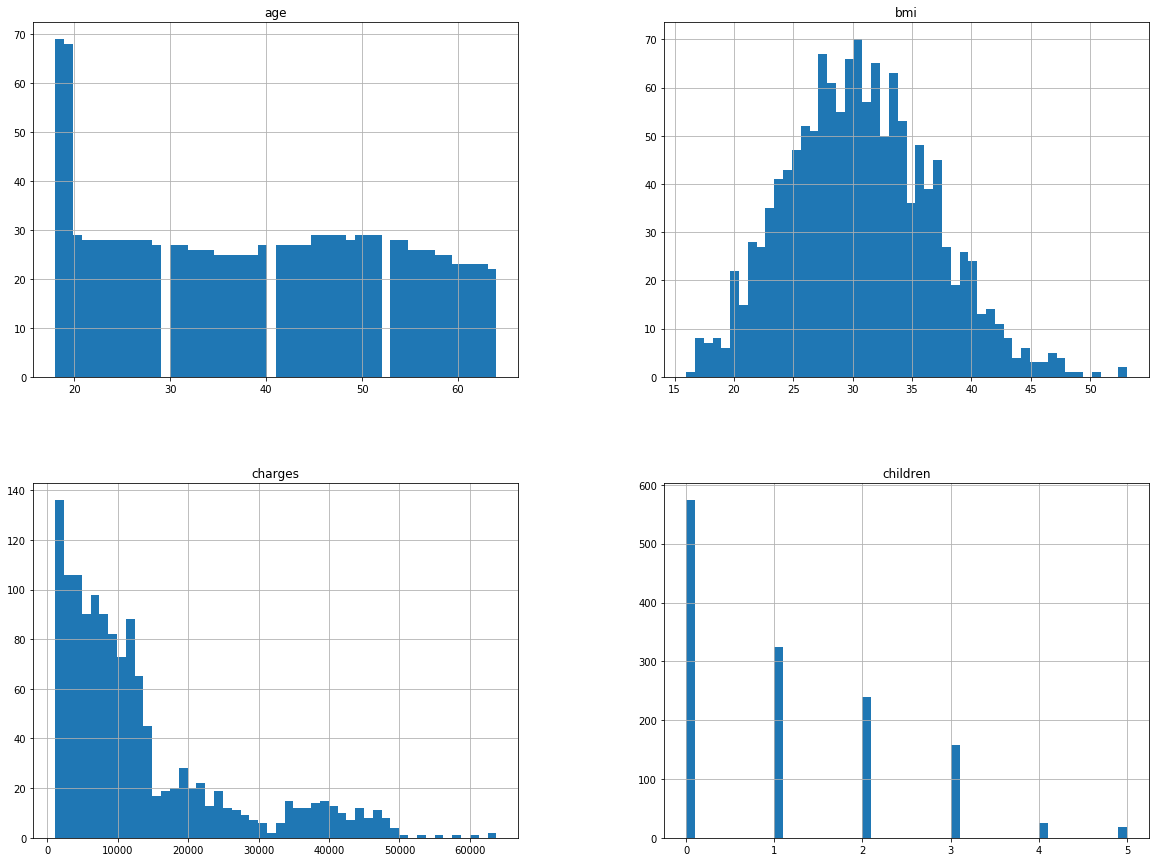

In [6]:
df.hist(bins=50, figsize=(20,15))
plt.show()

### Studio le relazioni fra le variabili del dataset e se influiscono sui costi

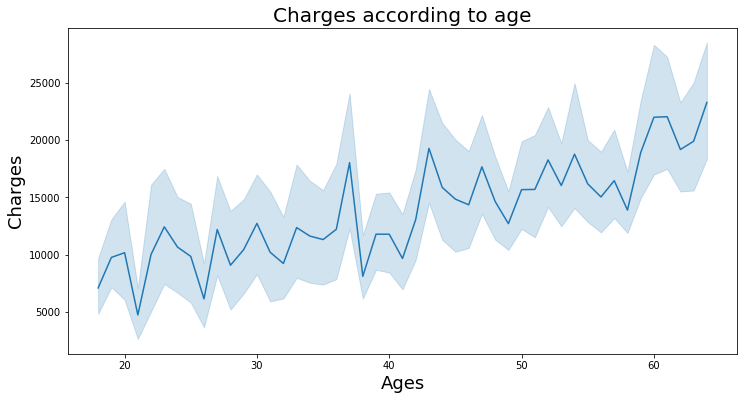

In [7]:
# Relazione fra le variabili age e charges
plt.figure(figsize=(12,6))
sns.lineplot(x='age', y='charges', data=df)
plt.title('Charges according to age', size='20')
plt.ylabel('Charges',size=18)
plt.xlabel('Ages',size=18)
plt.show()

Notiamo una tendenza di crescita di costi all'aumento dell'età

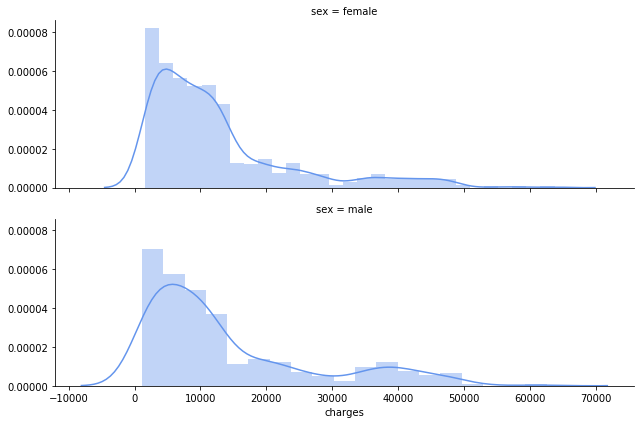

In [8]:
#Il sesso infeluisce sul costo?
x1 = sns.FacetGrid(df, row='sex', height=3, aspect=3)
x1 = x1.map(sns.distplot, 'charges', color='cornflowerblue')
plt.show()

Osservando le distribuzioni della variabile 'sex' (molto simili tra loro) possiamo dire che il sesso del paziente non influisce sul costo

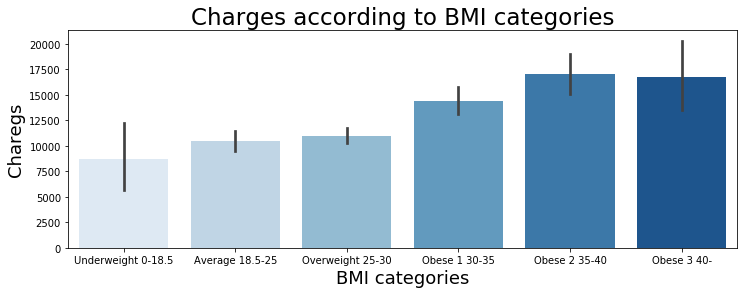

In [9]:
#Classificare le persone in bins a dependenza dal loro BMI
bins = [0, 18.5, 25, 30, 35, 40, 60]
labels = ['Underweight 0-18.5', 'Average 18.5-25', 'Overweight 25-30', 'Obese 1 30-35', 'Obese 2 35-40', 'Obese 3 40-']
df['bmi_bins'] = pd.cut(df['bmi'], bins=bins, labels=labels)

#Il costo rispetto il BMI 
plt.figure(figsize=(12,4))
sns.barplot(x='bmi_bins', y='charges', data=df, palette='Blues')
plt.title('Charges according to BMI categories', size='23')
plt.ylabel('Charegs',size=18)
plt.xlabel('BMI categories',size=18)
plt.show()

Possiamo notare un aumento dei costi per le categorie di pazienti che hanno un peso sopra la media.

## Per scoprire di più la correlazioni fra i variabili calcolo la  matrice di correlazione

Prima di partire serve trasformare le variabili categoriche in valori numerici, questa operazione sarà utile anche più in avanti quando si va ad implemetare la regressione

## Una spiegazione presa da internet su come si trasformano i dati categorici


### Encoding
Machine learning algorithms cannot work with categorical data directly, categorical data must be converted to number.
 1. Label Encoding
 2. One hot encoding
 3. Dummy variable trap

**Label encoding** refers to transforming the word labels into numerical form so that the algorithms can understand how to operate on them.

A **One hot encoding** is a representation of categorical variable as binary vectors.It allows the representation of categorical data to be more expresive. This first requires that the categorical values be mapped to integer values, that is label encoding. Then, each integer value is represented as a binary vector that is all zero values except the index of the integer, which is marked with a 1.

The **Dummy variable trap** is a scenario in which the independent variable are multicollinear, a scenario in which two or more variables are highly correlated in simple term one variable can be predicted from the others.

In general, categorical variables with large variability are best encoded using OneHotEncoder and so on. 


### Nel nostro caso è sufficente utilizzare Label Encoding 

In [10]:
from sklearn.preprocessing import LabelEncoder

df = df.drop(['bmi_bins'], axis = 1)

df_encoded = df.copy(deep=True)

#Sesso
labelEncoder = LabelEncoder()
labelEncoder.fit(df_encoded.sex.drop_duplicates()) 
df_encoded.sex = labelEncoder.transform(df_encoded.sex)

# Fumatore o non fumatore
labelEncoder.fit(df_encoded.smoker.drop_duplicates()) 
df_encoded.smoker = labelEncoder.transform(df_encoded.smoker)

#regione
labelEncoder.fit(df_encoded.region.drop_duplicates()) 
df_encoded.region = labelEncoder.transform(df_encoded.region)

In [11]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [12]:
df_encoded.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


Le variabili categoriche diventono encodate come segue:
 
Region:
 - southwest = 3
 - southeast = 2
 - northwest = 1
 - northeast = 0
 
smoker: yes = 1, no = 0
 
sex: male = 1, female = 0

## 3. Matrice di correlazione

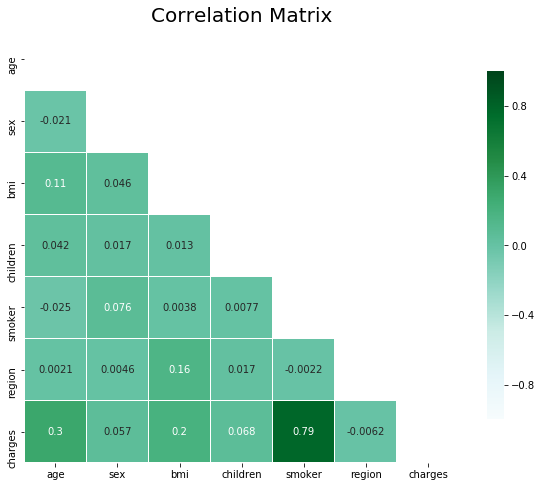

In [13]:
# Calcolo dei coefficienti di correlazione tra le features
corr_matrix = df_encoded.corr()

mask = np.zeros_like(corr_matrix, dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(10, 8))
plt.title('Correlation Matrix',fontsize=20)

sns.heatmap(corr_matrix,linewidths=0.25,vmin=-1.0, vmax=1.0,square=True,cmap="BuGn",
            linecolor='w',annot=True,annot_kws={"size":10},mask=mask,cbar_kws={"shrink": 0.8});

La matrice di correlazione ci conferma i risultati trovati prima nell'analisi di relazione fra i variabili, cioè l'età e il bmi influiscono sui costi. In più scopriamo una cosa interessante ovvero la correlazione pari a 0.79 fra la variabile smoker e i charges.

## 2. Metodi di regressione

In questa sezione applico i vari metodi di regressione visti in classe


In [14]:
# import di moduli di scikit learn
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

## 2.1 Regressione lineare



In [15]:
# Rimuovo le variabili che non sono influenti sul costo
x = df_encoded.drop(['charges', 'sex', 'region'], axis = 1)
y = df_encoded.charges

x_train,x_test,y_train,y_test = train_test_split(x,y, random_state= 1) # default test_size = 0.25, train_size= 0.75

# Addestramento di un LinearRegression
linear_regression = LinearRegression().fit(x_train,y_train)

# Ottenimento delle predizioni (validation)
linearPred = linear_regression.predict(x_test)

In [16]:
# calcolo di RMSE e R2

print('intercept: ', linear_regression.intercept_)
print('coefficent: ', linear_regression.coef_)

r2Linear = r2_score(y_test,linearPred)
rmseLinear = np.sqrt(mean_squared_error(y_test, linearPred))
print('Linear RMSE: ', rmseLinear)
print('Linear R2:', r2Linear)

intercept:  -11339.791146868098
coefficent:  [  252.22646865   308.01705671   356.46873495 24044.11859327]
Linear RMSE:  6005.930711849331
Linear R2: 0.7318433811355296


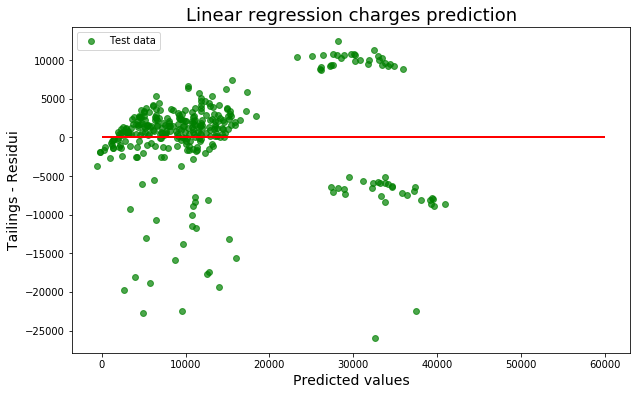

In [17]:
plt.figure(figsize=(10,6))

plt.scatter(linearPred,linearPred - y_test, c = 'green', marker = 'o', s = 35, alpha = 0.7,label = 'Test data')

plt.title('Linear regression charges prediction',fontsize=18)
plt.xlabel('Predicted values',fontsize=14)
plt.ylabel('Tailings - Residui',fontsize=14)
plt.legend(loc = 'upper left')
plt.hlines(y = 0, xmin = 0, xmax = 60000, lw = 2, color = 'red')
plt.show()

### Regularizzazione  Ridge e Lasso

In [18]:
# Ridge 

ridgeModel = Ridge()
ridge = ridgeModel.fit(x_train, y_train)
ridgePred = ridge.predict(x_test)
mseRidge = mean_squared_error(y_test, ridgePred)
rmseRidge = np.sqrt(mseRidge)
r2Ridge = r2_score(y_test,ridgePred)
print('RMSE Ridge: ', rmseRidge)
print('R2 Ridge: ', r2Ridge)

print('intercept: ', ridge.intercept_)
print('coefficent: ', ridge.coef_)

RMSE Ridge:  6002.7263562809
R2 Ridge:  0.7321294450188264
intercept:  -11308.560107189274
coefficent:  [  252.17455367   308.08794462   355.41917522 23901.07926436]


In [19]:
#Lasso

lassoModel = Lasso()
lasso = lassoModel.fit(x_train, y_train)
lassoPred = lasso.predict(x_test)
mseLasso = mean_squared_error(y_test, lassoPred)
rmseLasso = np.sqrt(mseLasso)
r2Lasso = r2_score(y_test,lassoPred)
print('RMSE Lasso: ', rmseLasso)
print('R2 Lasso: ', r2Lasso)

print('intercept: ', lasso.intercept_)
print('coefficent: ', lasso.coef_)

RMSE Lasso:  6005.868300488482
R2 Lasso:  0.7318489542709352
intercept:  -11337.10625134848
coefficent:  [  252.23113536   307.99091036   355.75342479 24038.08743994]


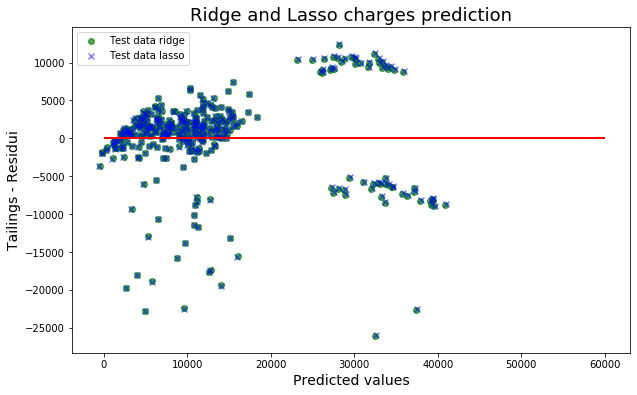

In [20]:
plt.figure(figsize=(10,6))

plt.scatter(ridgePred, ridgePred - y_test, c = 'green', marker = 'o', s = 35, alpha = 0.7,label = 'Test data ridge')
plt.scatter(lassoPred, lassoPred - y_test, c = 'blue', marker = 'x', s = 35, alpha = 0.5,label = 'Test data lasso')

plt.title('Ridge and Lasso charges prediction',fontsize=18)
plt.xlabel('Predicted values',fontsize=14)
plt.ylabel('Tailings - Residui',fontsize=14)
plt.legend(loc = 'upper left')
plt.hlines(y = 0, xmin = 0, xmax = 60000, lw = 2, color = 'red')
plt.show()

### Regressione polinomiale

In [21]:
X = df_encoded.drop(['charges', 'sex', 'region'], axis = 1)
Y = df_encoded.charges

quad = PolynomialFeatures (degree = 2)
x_quad = quad.fit_transform(X)

X_train,X_test,Y_train,Y_test = train_test_split(x_quad, Y, random_state = 0)

plr = LinearRegression().fit(X_train,Y_train)

plrPred = plr.predict(X_test)
msePol = mean_squared_error(Y_test, plrPred)
rmsePol = np.sqrt(msePol)
r2Pol = r2_score(Y_test, plrPred)

print('Rmse Polinomial: ', rmsePol)
print('R2 Polinomial: ', r2Pol)

Rmse Polinomial:  4255.725038895034
R2 Polinomial:  0.8849604493599119


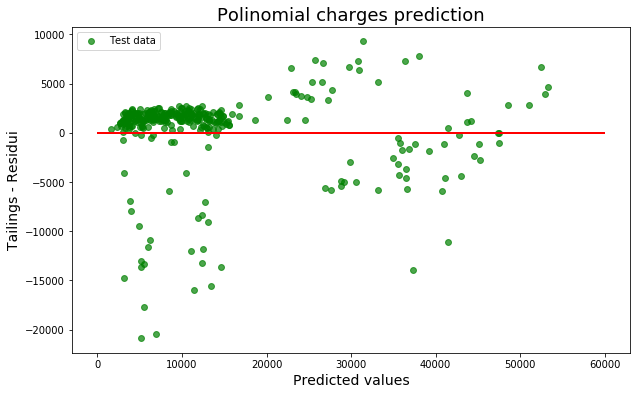

In [22]:
plt.figure(figsize=(10,6))

plt.scatter(plrPred, plrPred - Y_test,c = 'green', marker = 'o', s = 35, alpha = 0.7,label = 'Test data')

plt.title('Polinomial charges prediction',fontsize=18)
plt.xlabel('Predicted values',fontsize=14)
plt.ylabel('Tailings - Residui',fontsize=14)
plt.legend(loc = 'upper left')
plt.hlines(y = 0, xmin = 0, xmax = 60000, lw = 2, color = 'red')
plt.show()

## 2.2 Regressione random forest

In [23]:
forest = RandomForestRegressor() 
forest.fit(x_train,y_train)

forest_test_pred = forest.predict(x_test)

rmseRF = np.sqrt(mean_squared_error(y_test,forest_test_pred))
r2RF = r2_score(y_test, forest_test_pred)
print('RMSE RF data: %.3f' % rmseRF)
print('R2 RF data: %.3f' % r2RF)

RMSE RF data: 5267.172
R2 RF data: 0.794


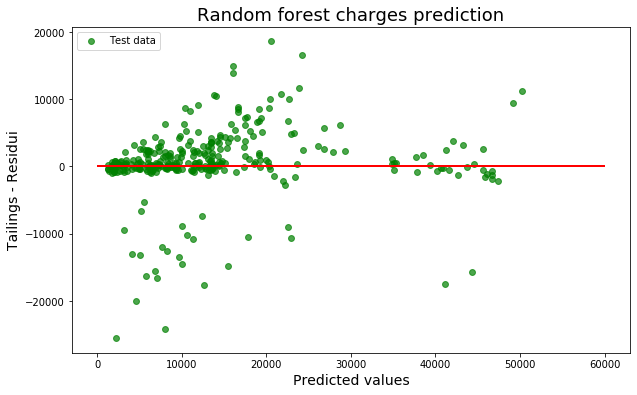

In [24]:
plt.figure(figsize=(10,6))

plt.scatter(forest_test_pred,forest_test_pred - y_test,c = 'green', marker = 'o', s = 35, alpha = 0.7,label = 'Test data')
plt.title('Random forest charges prediction',fontsize=18)
plt.xlabel('Predicted values' ,fontsize=14)
plt.ylabel('Tailings - Residui', fontsize=14)
plt.legend(loc = 'upper left')
plt.hlines(y = 0, xmin = 0, xmax = 60000, lw = 2, color = 'red')
plt.show()

### Ottimizzazione di Random Forest con Cross-Validation

In [25]:
# Ottimizzazione con Cross-Validation

from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
reg = RandomForestRegressor(n_jobs= -1) # n_jobs= -1 means using all processors. 

param_grid = [{'n_estimators': [10, 50, 100], 'max_depth': [None, 2, 3], 'random_state': [1, 2, 3, 4]}]

# Con shuffle=False si otterranno fold temporalmente ordinate
# (se i pattern non sono stati precedentemente mescolati)
experiment_gscv = GridSearchCV(reg, param_grid, cv=KFold(n_splits=4, shuffle=False), scoring='neg_mean_squared_error')

experiment_gscv.fit(x_test, y_test)

# Stampa risultati
#print('Combinazioni di parametri:\n', experiment_gscv.cv_results_['params'])
#print('RMSE medio per combinazione:\n', np.sqrt(-experiment_gscv.cv_results_['mean_test_score']))
print('Combinazione migliore:\n', experiment_gscv.best_params_)
print('RMSE medio della combinazione migliore: %.3f' % np.sqrt(-experiment_gscv.best_score_))

Combinazione migliore:
 {'max_depth': 3, 'n_estimators': 10, 'random_state': 1}
RMSE medio della combinazione migliore: 4461.739


C:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [26]:
# Verifica dei parametri trovati (utilizzando cross_val_score o il validation set)

forest = RandomForestRegressor(**experiment_gscv.best_params_)
forest.fit(x_train, y_train)


forest_test_pred = forest.predict(x_test)

rmseRF_CV = np.sqrt(mean_squared_error(y_test,forest_test_pred))
r2RF_CV = r2_score(y_test,forest_test_pred)
print('RMSE test data: %.3f' % rmseRF_CV)
print('R2 test data: %.3f' % r2RF_CV)

RMSE test data: 4565.486
R2 test data: 0.845


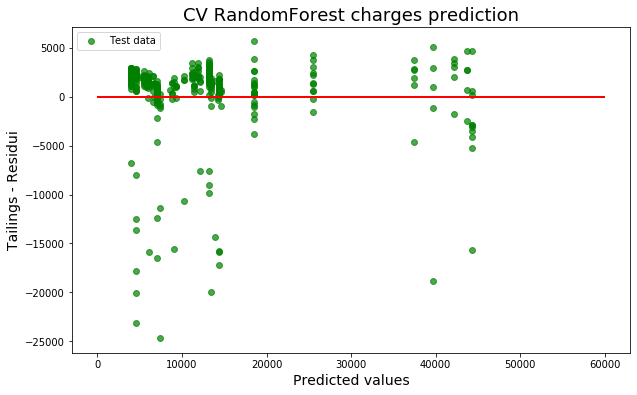

In [27]:
plt.figure(figsize=(10,6))

plt.scatter(forest_test_pred,forest_test_pred - y_test,c = 'green', marker = 'o', s = 35, alpha = 0.7,label = 'Test data')
plt.title('CV RandomForest charges prediction',fontsize=18)
plt.xlabel('Predicted values',fontsize=14)
plt.ylabel('Tailings - Residui',fontsize=14)
plt.legend(loc = 'upper left')
plt.hlines(y = 0, xmin = 0, xmax = 60000, lw = 2, color = 'red')
plt.show()

### 2.3 Confronto i regressori

In [28]:
performanceData = pd.DataFrame({"model":["linear", "lasso", "ridge", 'Polinomial', 'RandomForest', 'RandomForest CV' ], 
                                "rmse":[rmseLinear, rmseLasso, rmseRidge, rmsePol, rmseRF, rmseRF_CV],
                                "R2":[r2Linear, r2Lasso, r2Ridge, r2Pol, r2RF, r2RF_CV]})
print(performanceData)

             model         rmse        R2
0           linear  6005.930712  0.731843
1            lasso  6005.868300  0.731849
2            ridge  6002.726356  0.732129
3       Polinomial  4255.725039  0.884960
4     RandomForest  5267.172036  0.793755
5  RandomForest CV  4565.486252  0.845046


## Conclusioni su analisi esplorativa e regressione 

Abbiamo scoperto che la regione e il genere non comportano differenze significative sul costo sanitario. età, bmi, numero di bambini e il fumo sono quelli che determinano il costo.

La regrssione polinomiale e la regressione basata sull'algoritmo Random Forest hanno fornito i migliori risultati.

La regularizzazione del modello lineare non ha prodotto un miglioramento significativo, Ciò dimostra che i modelli di regressione regolarizzati non garantiscono sempre risultati superiori alla regressione lineare.


## 3. Metodi di classificazione


Qui vogliamo fare una classificazione che ci dice se il paziente è fumatore oppure no dati costo di cura, età e bmi.
Ho già trasformato la variabile categorica smoker in 1 per il Sì e 0 per il No, quindi posso partire senza ulteriori trasformazioni


### 3.1 Classificazione con KNN

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier


features = np.array(df_encoded.drop(['smoker', 'children', 'sex', 'region'], 1))
target_class = np.array(df_encoded.smoker)

x_train,x_test,y_train,y_test = train_test_split(features, target_class, random_state= 1)

parameters = {'n_neighbors': np.arange(10) + 1}
knn = KNeighborsClassifier()

optimal_knn = GridSearchCV(knn, parameters, cv=5)
optimal_knn.fit(x_train, y_train)


print('Best number of neighbors: ', optimal_knn.best_params_)

#example_measure = features.reshape(len(x), -1)
#print(example_measure)

#prediction = optimal_knn.predict(x_test)
#print(prediction)

Best number of neighbors:  {'n_neighbors': 5}


### 3.2 Classificazione con Regressione logistica

In [30]:
logistic_regression = LogisticRegression() 
logistic_regression.fit(x_train, y_train)


#print(logistic_regression.intercept_)
#print(logistic_regression.coef_)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

### 3.3 Confronto fra i due modelli di classificazione

#### Accuratezza dei modelli

In [31]:
accuracy_log_reg = logistic_regression.score(x_test, y_test)
accuracy_knn = optimal_knn.score(x_test, y_test)

accuracyData = pd.DataFrame({"model":["KNN", "Logistic Regression"], "Accuracy":[accuracy_knn, accuracy_log_reg]})

print(accuracyData)

                 model  Accuracy
0                  KNN  0.913433
1  Logistic Regression  0.943284


In [32]:
from sklearn.metrics import  confusion_matrix

def print_confusion_matrix(y_test, y_pred):
    print(confusion_matrix(y_test, y_pred))

y_pred_knn = optimal_knn.predict(x_test)
y_pred_logistic_reg = logistic_regression.predict(x_test)


In [33]:
print('confusion matrix KNN')
print_confusion_matrix(y_test, y_pred_knn)

confusion matrix KNN
[[255  18]
 [ 11  51]]


In [34]:
print('confusion matrix Logistic regression')
print_confusion_matrix(y_test, y_pred_logistic_reg)

confusion matrix Logistic regression
[[264   9]
 [ 10  52]]


#### Curve ROC dei due modelli

In [35]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import sklearn.metrics as sklm

#Plotting the ROC curve
def plot_auc(title, label, probs):
    fpr, tpr, threshold = sklm.roc_curve(label, probs[:, 1])
    auc = sklm.auc(fpr, tpr)

    plt.figure(figsize=(10,6))
    plt.title(title, fontsize= 18)
    plt.plot(fpr, tpr, color = 'orange', label = 'AUC (Area under the curve) = %0.2f' % auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('TPR', fontsize= 14)
    plt.xlabel('FPR', fontsize= 14)
    plt.show()

# Nota su probs[:, 1] da stack over flow
# Using [:,1] in the code will give you the probabilities of getting the output as 1.
# If you replace 1 with 0 in the code, you will only get the probabilities of getting the output as 0.

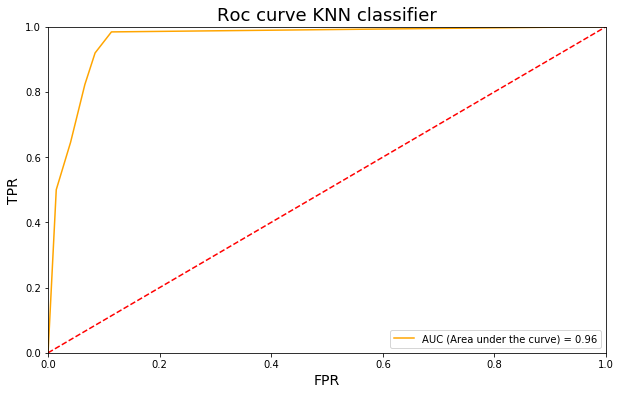

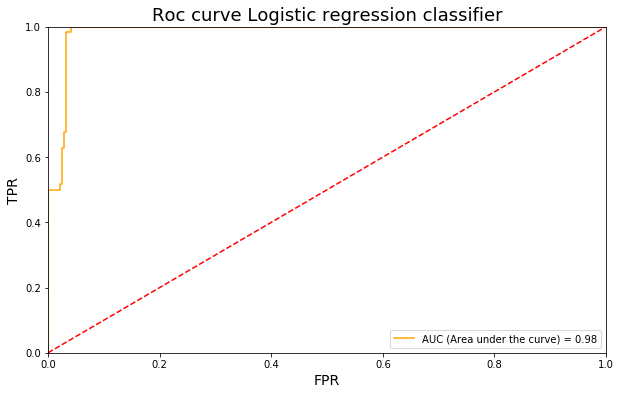

In [36]:
y_scores_knn = optimal_knn.predict_proba(x_test)
y_scores_logistic = logistic_regression.predict_proba(x_test)

plot_auc('Roc curve KNN classifier', y_test, y_scores_knn)
plot_auc('Roc curve Logistic regression classifier', y_test, y_scores_logistic)

#### True positive rate (TPR) = True positives / all positives

#### False positive rate (FPR) = False positives / all negatives

## 4. Clustering

### 4.1 KMeans 

In [37]:
from sklearn.cluster import KMeans

X = df_encoded[['bmi', 'charges']]

kmeans = KMeans(n_clusters=3)  
kmeans.fit(X)

# Printing the Centroids
print(kmeans.cluster_centers_)

[[3.04800394e+01 6.43014804e+03]
 [3.48454321e+01 4.07613086e+04]
 [2.88763542e+01 1.88976443e+04]]


In [38]:
print(kmeans.labels_)

[2 0 0 ... 0 0 2]


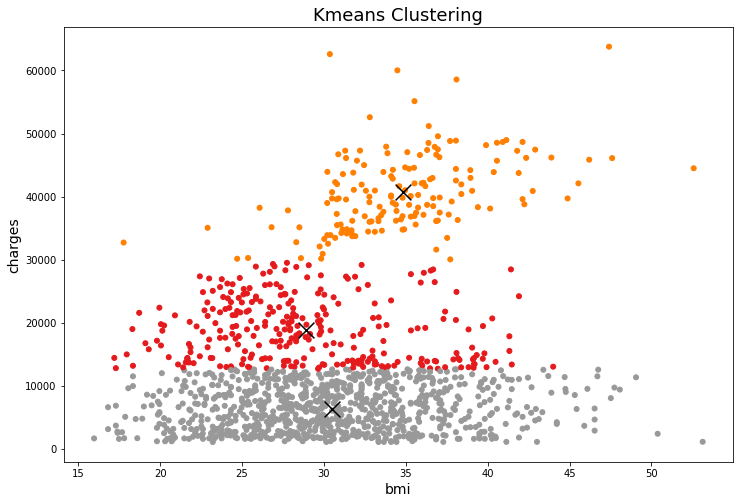

In [39]:
fig = plt.figure(figsize=(12,8))

plt.scatter(X.values[:,0], X.values[:,1], c=kmeans.labels_, cmap="Set1_r", s=25)
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black', marker="x", s=250)
plt.title("Kmeans Clustering", fontsize=18)
plt.ylabel('charges', fontsize=14)
plt.xlabel('bmi', fontsize=14)
plt.show()